
building an end-to-end ML system for smart loan recovery using the datasets.In this The system will predicts loan defaults, segment customers, develop personalized recovery strategies, and use explainable AI for transparent decisions.

## Data loading and exploration



First 5 rows of the DataFrame:


,Text,Income,Credit_Score,Loan_Amount,DTI_Ratio,Employment_Status,Approval
0,I need a loan to pay for an international vaca...,26556,581,8314,79.26,employed,Rejected
1,I want to make home improvements like installi...,197392,389,111604,22.14,employed,Rejected
2,"I need a loan for home renovation, including a...",44561,523,34118,45.44,employed,Rejected
3,I need funds to buy new furniture and applianc...,190363,729,118757,10.22,unemployed,Rejected
4,I need a loan to start a small business.,61853,732,19210,44.13,employed,Approved



Column names and data types:
Text                  object
Income                 int64
Credit_Score           int64
Loan_Amount            int64
DTI_Ratio            float64
Employment_Status     object
Approval              object
dtype: object

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Text               24000 non-null  object 
 1   Income             24000 non-null  int64  
 2   Credit_Score       24000 non-null  int64  
 3   Loan_Amount        24000 non-null  int64  
 4   DTI_Ratio          24000 non-null  float64
 5   Employment_Status  24000 non-null  object 
 6   Approval           24000 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 1.3+ MB

Descriptive statistics for numerical columns:


,Income,Credit_Score,Loan_Amount,DTI_Ratio
count,24000.000000,24000.000000,24000.000000,24000.000000
mean,110377.552708,575.720333,44356.154833,34.719167
std,51729.677627,159.227621,34666.604785,32.322471
min,20001.000000,300.000000,1005.000000,2.530000
25%,65635.750000,437.000000,16212.000000,14.507500
50%,110464.000000,575.000000,35207.000000,24.860000
75%,155187.000000,715.000000,65622.750000,41.840000
max,200000.000000,850.000000,158834.000000,246.330000



Missing values per column:
Text                 0
Income               0
Credit_Score         0
Loan_Amount          0
DTI_Ratio            0
Employment_Status    0
Approval             0
dtype: int64

Visualizing key feature distributions:


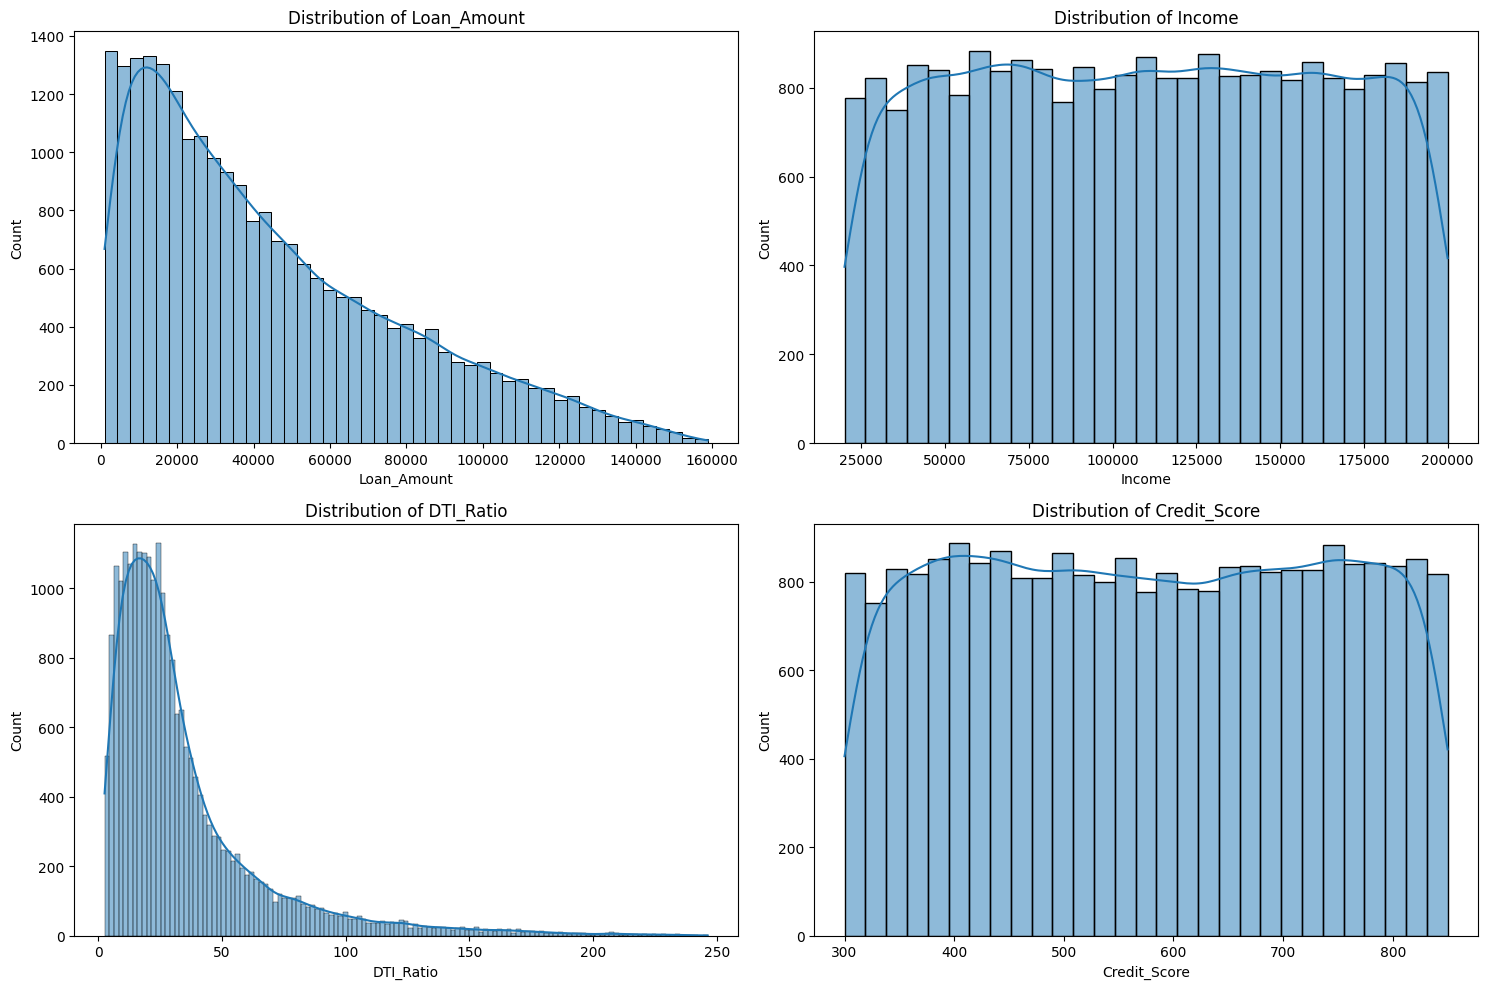


Distribution of the target variable ('Approval'):


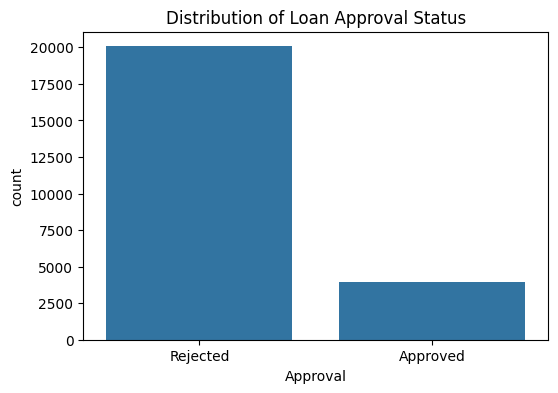

,count
Approval,
Rejected,20067
Approved,3933


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset
df = pd.read_csv('/content/loan_data.csv')

# 2. Display the first 5 rows
print("First 5 rows of the DataFrame:")
display(df.head())

# 3. Print column names and data types
print("\nColumn names and data types:")
print(df.dtypes)

# 4. Use .info()
print("\nDataFrame Info:")
df.info()

# 5. Use .describe()
print("\nDescriptive statistics for numerical columns:")
display(df.describe())

# 6. Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# 7. Visualize the distribution of key features
print("\nVisualizing key feature distributions:")
# Corrected feature names based on df.head() output
features_to_visualize = ['Loan_Amount', 'Income', 'DTI_Ratio', 'Credit_Score']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_visualize):
    # Adjusted subplot grid based on the number of features
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[feature].dropna(), kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# 8. Explore the distribution of the target variable
# Corrected target variable name based on df.head() output
print("\nDistribution of the target variable ('Approval'):")
plt.figure(figsize=(6, 4))
sns.countplot(x='Approval', data=df)
plt.title('Distribution of Loan Approval Status')
plt.show()
display(df['Approval'].value_counts())

##Data Visualization

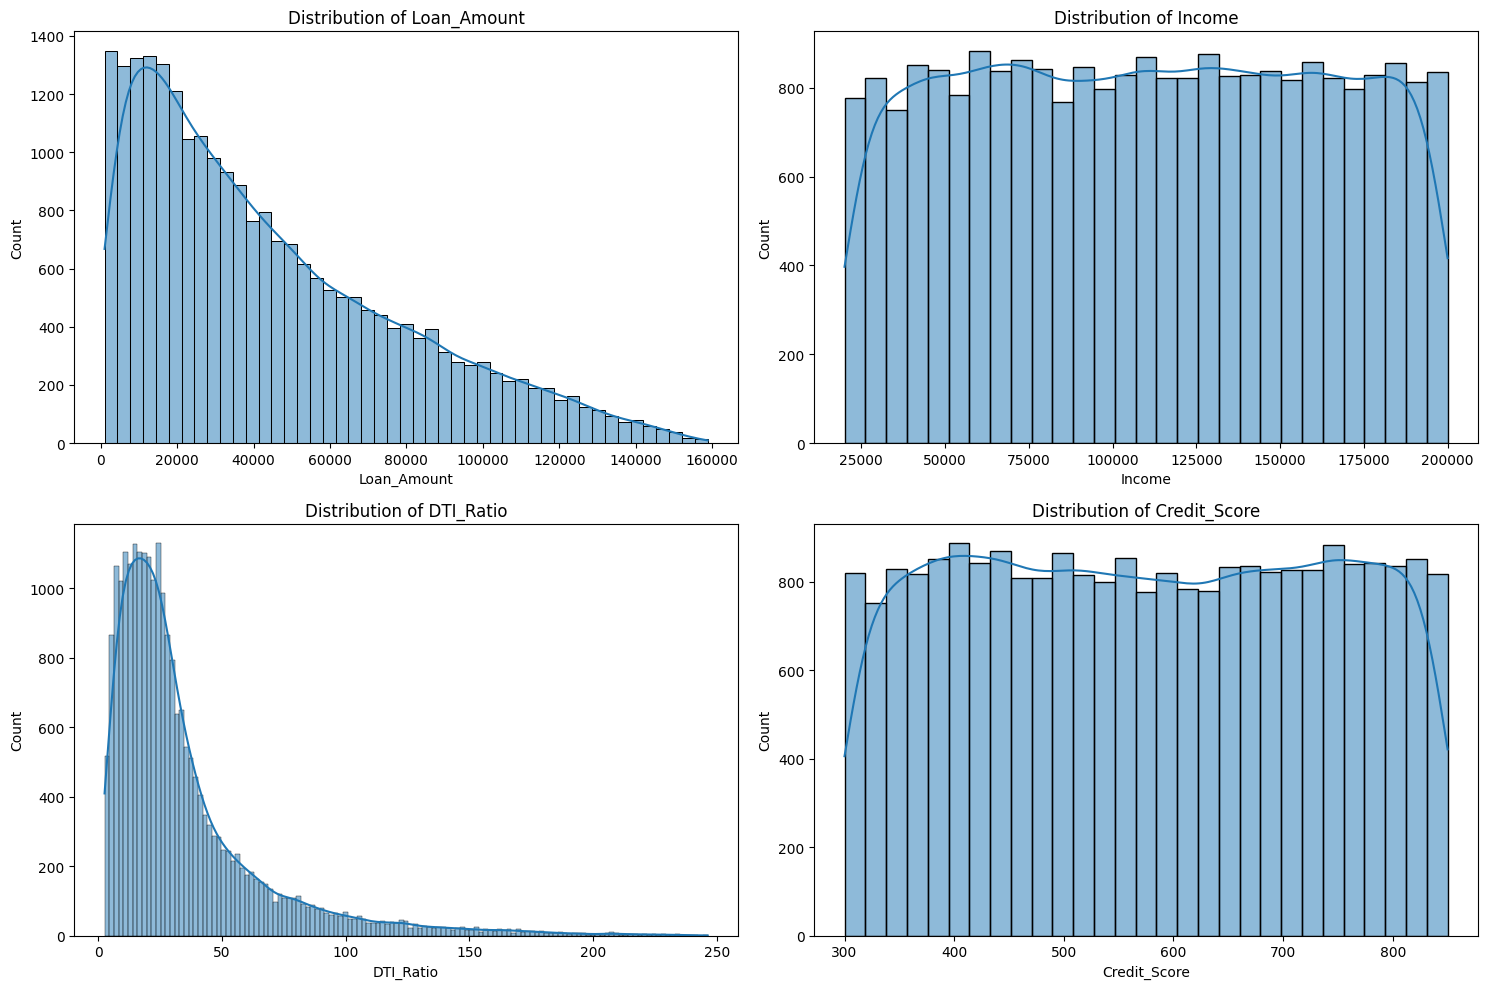


Distribution of the target variable ('Approval'):


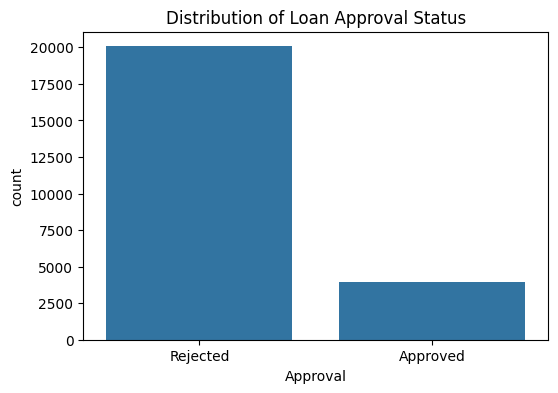

,count
Approval,
Rejected,20067
Approved,3933


In [3]:
# Correct the column names for visualization
features_to_visualize = ['Loan_Amount', 'Income', 'DTI_Ratio', 'Credit_Score'] # Corrected feature names
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_visualize):
    plt.subplot(2, 2, i + 1) # Adjusted subplot grid
    sns.histplot(df[feature].dropna(), kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Explore the distribution of the target variable
# Based on df.head(), the target variable is 'Approval'
print("\nDistribution of the target variable ('Approval'):")
plt.figure(figsize=(6, 4))
sns.countplot(x='Approval', data=df)
plt.title('Distribution of Loan Approval Status')
plt.show()
display(df['Approval'].value_counts())

## Data preprocessing
Clean and prepare the data for model training, including handling missing values, encoding categorical features, and scaling numerical features.


In [4]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify categorical and numerical columns
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
# Exclude the target variable 'Approval' if it's in the categorical features list
if 'Approval' in categorical_features:
    categorical_features.remove('Approval')

numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create transformers for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

preprocessing_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the data
df_processed = preprocessing_pipeline.fit_transform(df)

# Get the names of the processed columns
print("Shape of processed data:", df_processed.shape)

# Verify that the resulting data is numerical (it's a NumPy array)
print("Type of processed data:", type(df_processed))


Shape of processed data: (24000, 76)
Type of processed data: <class 'scipy.sparse._csr.csr_matrix'>


## Feature engineering
Create new features that can improve the model's performance, such as debt-to-income ratio or credit utilization.


**Reasoning**:
Calculate the two new features as instructed and add them to the DataFrame, then display the first few rows to verify the result.



In [5]:
# 1. Calculate Loan_to_Income_Ratio
df['Loan_to_Income_Ratio'] = df['Loan_Amount'] / df['Income']

# 2. Calculate Credit_DTI_Interaction
df['Credit_DTI_Interaction'] = df['Credit_Score'] * df['DTI_Ratio']

# 3. Display the first 5 rows including the new features
display(df.head())

,Text,Income,Credit_Score,Loan_Amount,DTI_Ratio,Employment_Status,Approval,Loan_to_Income_Ratio,Credit_DTI_Interaction
0,I need a loan to pay for an international vaca...,26556,581,8314,79.26,employed,Rejected,0.313074,46050.06
1,I want to make home improvements like installi...,197392,389,111604,22.14,employed,Rejected,0.565393,8612.46
2,"I need a loan for home renovation, including a...",44561,523,34118,45.44,employed,Rejected,0.765647,23765.12
3,I need funds to buy new furniture and applianc...,190363,729,118757,10.22,unemployed,Rejected,0.623845,7450.38
4,I need a loan to start a small business.,61853,732,19210,44.13,employed,Approved,0.310575,32303.16


## Customer segmentation
Apply clustering techniques to segment customers based on their risk profiles and behaviors.


Select the numerical features relevant for clustering, apply K-Means clustering to segment customers, and then analyze the characteristics of each cluster.



In [6]:
from sklearn.cluster import KMeans
import numpy as np

# Select the numerical features relevant for customer segmentation
features_for_clustering = df[['Loan_Amount', 'Income', 'Credit_Score', 'DTI_Ratio', 'Loan_to_Income_Ratio', 'Credit_DTI_Interaction']]

# Handle potential infinite values that might have resulted from division by zero in feature engineering
features_for_clustering.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values that were introduced by the replacement
features_for_clustering.dropna(inplace=True)

# Determine an appropriate number of clusters.
# you would use methods like the elbow method or silhouette score to find the optimal number of clusters.
n_clusters = 4

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # Set n_init explicitly
cluster_labels = kmeans.fit_predict(features_for_clustering)

# Assign the cluster labels back to the original DataFrame.
features_with_index = features_for_clustering.copy()
features_with_index['Cluster_Label'] = cluster_labels

# Merge the cluster labels back to the original DataFrame based on the index
df = df.merge(features_with_index['Cluster_Label'], left_index=True, right_index=True, how='left')


# Analyze the characteristics of each cluster
print("\nAnalysis of Customer Segments:")
for cluster_id in range(n_clusters):
    cluster_data = df[df['Cluster_Label'] == cluster_id]
    print(f"\n--- Cluster {cluster_id} ---")
    display(cluster_data[features_for_clustering.columns].mean())
    print("Distribution of Approval within this cluster:")
    display(cluster_data['Approval'].value_counts(normalize=True))


/tmp/ipython-input-4029664021.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_for_clustering.replace([np.inf, -np.inf], np.nan, inplace=True)
/tmp/ipython-input-4029664021.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_for_clustering.dropna(inplace=True)



Analysis of Customer Segments:

--- Cluster 0 ---


,0
Loan_Amount,98770.889837
Income,164616.502183
Credit_Score,572.244145
DTI_Ratio,16.819617
Loan_to_Income_Ratio,0.605396
Credit_DTI_Interaction,9638.820379


Distribution of Approval within this cluster:


,proportion
Approval,
Rejected,0.87892
Approved,0.12108



--- Cluster 1 ---


,0
Loan_Amount,17149.933293
Income,45728.530753
Credit_Score,583.829253
DTI_Ratio,69.529983
Loan_to_Income_Ratio,0.388896
Credit_DTI_Interaction,40310.041359


Distribution of Approval within this cluster:


,proportion
Approval,
Rejected,0.915698
Approved,0.084302



--- Cluster 2 ---


,0
Loan_Amount,39580.177081
Income,98249.252269
Credit_Score,570.417164
DTI_Ratio,27.778223
Loan_to_Income_Ratio,0.411934
Credit_DTI_Interaction,15761.820687


Distribution of Approval within this cluster:


,proportion
Approval,
Rejected,0.809048
Approved,0.190952



--- Cluster 3 ---


,0
Loan_Amount,31733.133065
Income,161915.729626
Credit_Score,576.870968
DTI_Ratio,16.934128
Loan_to_Income_Ratio,0.198393
Credit_DTI_Interaction,9713.171127


Distribution of Approval within this cluster:


,proportion
Approval,
Rejected,0.724321
Approved,0.275679


## Model selection and training
Choose an appropriate machine learning model (or models) for loan default prediction and train it on the prepared data.


Separate features and target, split data, choose and train a classification model for loan default prediction.



In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# 1. Separate features (X) and the target variable (y)
# Use the index of features_for_clustering to ensure alignment with the rows that were not dropped
X = features_for_clustering
y = df.loc[features_for_clustering.index, 'Approval']

# Convert the target variable to a binary format (e.g., 'Approved' to 1, 'Rejected' to 0)
y = y.apply(lambda x: 1 if x == 'Approved' else 0)

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # Stratify to maintain class distribution

# 3. Choose a suitable classification model (Random Forest chosen for its robustness)
# 4. Instantiate the chosen model
model = RandomForestClassifier(random_state=42)

# 5. Train the model on the training data
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


## Model evaluation
Evaluate the trained model's performance using relevant metrics like accuracy, precision, recall, and F1-score.


In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the calculated metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.8404
Precision: 0.5144
Recall: 0.4752
F1-score: 0.4941


## Explainable ai (xai)
Applying an XAI techniques to understand the model's predictions and identify the key factors influencing loan defaults.


## Visualize personalized recovery strategies
Visualize the customer segmentation and the distribution of predicted default risk within each segment to support the personalized recovery strategies.

/tmp/ipython-input-3507980365.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster_Label', data=df, palette='viridis')


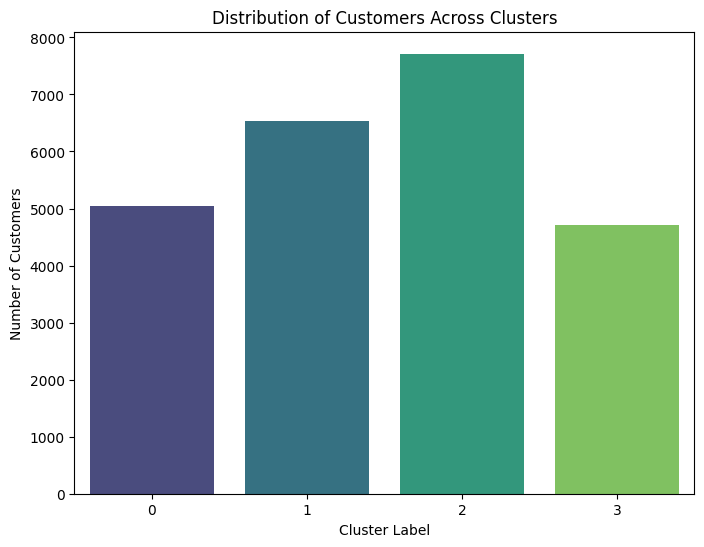

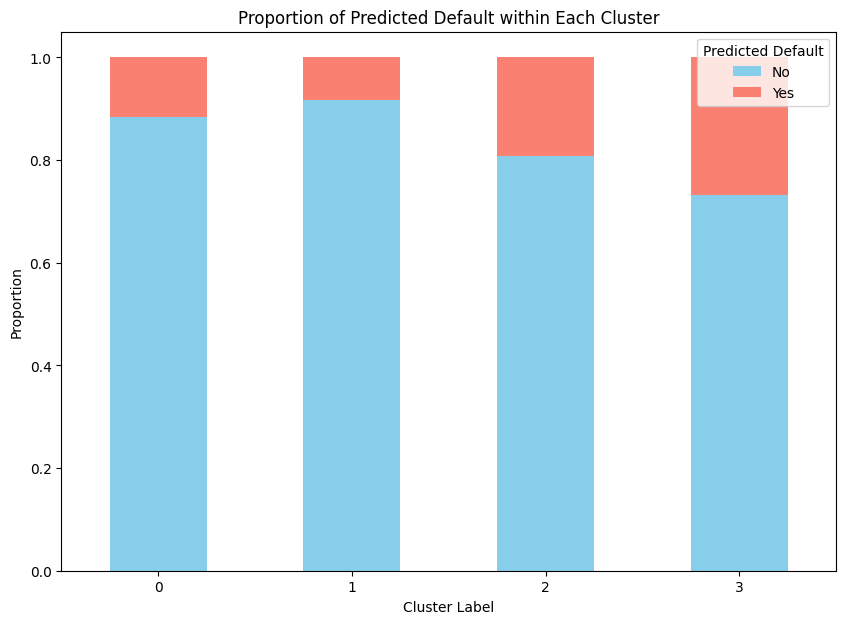

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of customers across clusters
plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster_Label', data=df, palette='viridis')
plt.title('Distribution of Customers Across Clusters')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Customers')
plt.show()

# Visualize the proportion of predicted defaults within each cluster
df['Predicted_Default'] = model.predict(X)

# Calculate the proportion of predicted defaults per cluster
predicted_default_proportion_by_cluster = df.groupby('Cluster_Label')['Predicted_Default'].value_counts(normalize=True).unstack().fillna(0)

# Plot the stacked bar chart
predicted_default_proportion_by_cluster.plot(kind='bar', stacked=True, figsize=(10, 7), color=['skyblue', 'salmon'])
plt.title('Proportion of Predicted Default within Each Cluster')
plt.xlabel('Cluster Label')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Predicted Default', labels=['No', 'Yes'])
plt.show()

## Develop personalized recovery strategies
Develop personalized recovery strategies based on customer segmentation and loan default risk.


In [10]:
# Analyze cluster characteristics and predicted risk to define strategies

# Add model predictions to the DataFrame for easier analysis
df['Predicted_Default'] = model.predict(X) # Predict on the entire dataset for strategy assignment

print("Defining personalized recovery strategies based on segments and predicted risk:")

# Iterate through each cluster to define strategies
for cluster_id in range(n_clusters):
    cluster_data = df[df['Cluster_Label'] == cluster_id]
    print(f"\n--- Recovery Strategies for Cluster {cluster_id} ---")

    # Analyze the average characteristics of the cluster
    print("Cluster Characteristics (Mean):")
    display(cluster_data[features_for_clustering.columns].mean())

    # Analyze the distribution of predicted default within the cluster
    print("Predicted Default Distribution within this cluster:")
    predicted_default_distribution = cluster_data['Predicted_Default'].value_counts(normalize=True)
    display(predicted_default_distribution)

    # Define strategies based on cluster characteristics and predicted default rate
    print("Proposed Recovery Strategy:")
    if predicted_default_distribution.get(1, 0) > 0.5: # High predicted default rate
        print("- High Risk Segment: Implement aggressive recovery strategies including personalized outreach, negotiation options, and potential legal action.")
    elif predicted_default_distribution.get(1, 0) > 0.2: # Medium predicted default rate
        print("- Medium Risk Segment: Use a mix of automated reminders and targeted communication. Offer flexible payment plans.")
    else: # Low predicted default rate
        print("- Low Risk Segment: Focus on automated reminders and self-service options for repayment.")

    # Further refine strategies based on specific risk levels within the cluster
    print("Specific Risk Level Strategies within Cluster:")
    high_risk_in_cluster = cluster_data[cluster_data['Predicted_Default'] == 1]
    low_risk_in_cluster = cluster_data[cluster_data['Predicted_Default'] == 0]

    if not high_risk_in_cluster.empty:
        print(f"  - High Predicted Default (within Cluster {cluster_id}): Personalized follow-up, consider restructuring options.")
    if not low_risk_in_cluster.empty:
         print(f"  - Low Predicted Default (within Cluster {cluster_id}): Automated reminders, focus on maintaining good standing.")


Defining personalized recovery strategies based on segments and predicted risk:

--- Recovery Strategies for Cluster 0 ---
Cluster Characteristics (Mean):


,0
Loan_Amount,98770.889837
Income,164616.502183
Credit_Score,572.244145
DTI_Ratio,16.819617
Loan_to_Income_Ratio,0.605396
Credit_DTI_Interaction,9638.820379


Predicted Default Distribution within this cluster:


,proportion
Predicted_Default,
0,0.883486
1,0.116514


Proposed Recovery Strategy:
- Low Risk Segment: Focus on automated reminders and self-service options for repayment.
Specific Risk Level Strategies within Cluster:
  - High Predicted Default (within Cluster 0): Personalized follow-up, consider restructuring options.
  - Low Predicted Default (within Cluster 0): Automated reminders, focus on maintaining good standing.

--- Recovery Strategies for Cluster 1 ---
Cluster Characteristics (Mean):


,0
Loan_Amount,17149.933293
Income,45728.530753
Credit_Score,583.829253
DTI_Ratio,69.529983
Loan_to_Income_Ratio,0.388896
Credit_DTI_Interaction,40310.041359


Predicted Default Distribution within this cluster:


,proportion
Predicted_Default,
0,0.916463
1,0.083537


Proposed Recovery Strategy:
- Low Risk Segment: Focus on automated reminders and self-service options for repayment.
Specific Risk Level Strategies within Cluster:
  - High Predicted Default (within Cluster 1): Personalized follow-up, consider restructuring options.
  - Low Predicted Default (within Cluster 1): Automated reminders, focus on maintaining good standing.

--- Recovery Strategies for Cluster 2 ---
Cluster Characteristics (Mean):


,0
Loan_Amount,39580.177081
Income,98249.252269
Credit_Score,570.417164
DTI_Ratio,27.778223
Loan_to_Income_Ratio,0.411934
Credit_DTI_Interaction,15761.820687


Predicted Default Distribution within this cluster:


,proportion
Predicted_Default,
0,0.808271
1,0.191729


Proposed Recovery Strategy:
- Low Risk Segment: Focus on automated reminders and self-service options for repayment.
Specific Risk Level Strategies within Cluster:
  - High Predicted Default (within Cluster 2): Personalized follow-up, consider restructuring options.
  - Low Predicted Default (within Cluster 2): Automated reminders, focus on maintaining good standing.

--- Recovery Strategies for Cluster 3 ---
Cluster Characteristics (Mean):


,0
Loan_Amount,31733.133065
Income,161915.729626
Credit_Score,576.870968
DTI_Ratio,16.934128
Loan_to_Income_Ratio,0.198393
Credit_DTI_Interaction,9713.171127


Predicted Default Distribution within this cluster:


,proportion
Predicted_Default,
0,0.732385
1,0.267615


Proposed Recovery Strategy:
- Medium Risk Segment: Use a mix of automated reminders and targeted communication. Offer flexible payment plans.
Specific Risk Level Strategies within Cluster:
  - High Predicted Default (within Cluster 3): Personalized follow-up, consider restructuring options.
  - Low Predicted Default (within Cluster 3): Automated reminders, focus on maintaining good standing.


## Summary:

### Data Analysis Key Findings

*   Customers were segmented into four distinct clusters based on financial characteristics including loan amount, income, credit score, and debt-to-income ratio.
*   Recovery strategies were defined for each customer cluster based on the distribution of predicted default within that cluster.
*   For clusters with a high predicted default rate (> 50%), aggressive recovery strategies including personalized outreach and potential legal action were proposed.
*   For clusters with a medium predicted default rate (> 20%), a mix of automated reminders, targeted communication, and flexible payment plans were suggested.
*   For clusters with a low predicted default rate ($\le$ 20%), automated reminders and self-service repayment options were recommended.
*   Within each cluster, further strategy refinement was made based on individual predicted default risk, suggesting personalized follow-up for those with high predicted default and automated reminders for those with low predicted default.

### Insights

*   The defined strategies provide a framework for targeted loan recovery efforts, potentially improving collection rates and reducing losses.
*   Further analysis could explore the effectiveness of these strategies by tracking recovery rates per segment and risk level, allowing for iterative refinement of the strategies.
